In [1]:
include("../partitions.jl")
using ProgressMeter, Plots, Statistics, Distributions
Random.seed!(2025)

TaskLocalRNG()

In [2]:
k = 4
n = 10^k
reps = 10^5
steps = 20
partitions = reflected_burnside_sample(n, steps, reps)

10000×100000 SparseMatrixCSC{Integer, Int64} with 7777124 stored entries:
⎡⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⎤
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎦

In [3]:
parts = [num_parts(partitions[:,i]) for i in 1:reps]
ones = [num_ls(partitions[:,i], 1) for i in 1:reps]

100000-element Vector{Int64}:
  22
  42
  28
 173
  39
  48
  18
   7
  61
 163
   ⋮
  32
  13
   1
  92
  73
  49
  78
  16
  71

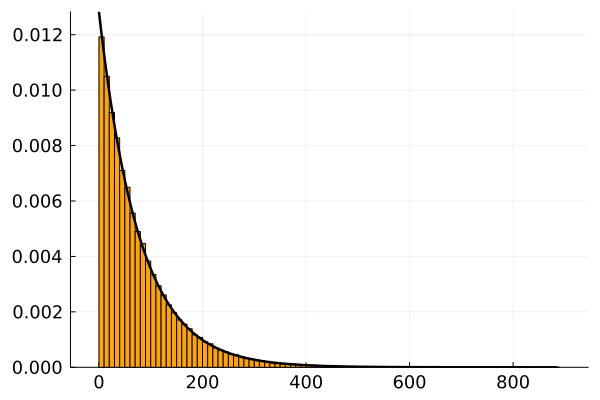

In [4]:
mu = sqrt(6*n)/pi 
hist = histogram(ones, 
                normalize=true, 
                legend = false, 
                color = :orange, 
                bins =:scott,
                xtickfontsize=12,
                ytickfontsize=12,
                formatter = identity)
exp_density(x) = exp.(-x./mu)./mu
max_one = maximum(ones)
xs = 0:max_one
plot!(hist, xs, exp_density(xs),color =:black, linewidth=2.5)
savefig(hist, "../Figures/ones_1e$k.pdf")
hist

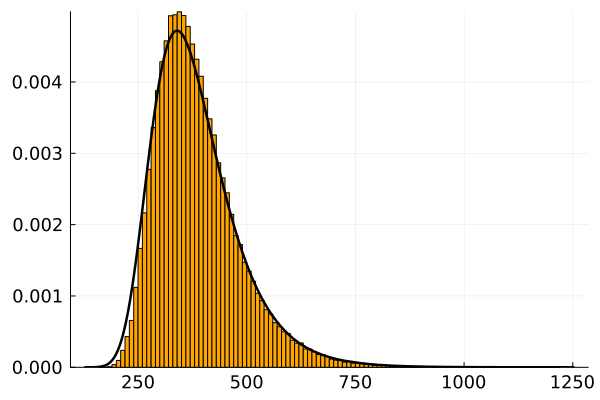

In [5]:
scale = sqrt(6*n)/pi 
loc = log(sqrt(6*n)/pi)*scale

hist = histogram(parts,
                normalize=true, 
                legend = false, 
                color = :orange, 
                bins =:scott,
                xtickfontsize=12,
                ytickfontsize=12,
                formatter = identity)
gumble_cdf(x) = exp.(.-(x.-loc)./scale .- exp.(.-(x.-loc)./scale))./scale
plot!(hist, gumble_cdf, color =:black, linewidth=2.5)
savefig(hist, "../Figures/parts_1e$k.pdf")
hist

In [6]:
k = 6
n = 10^k
reps = 10^5
steps = 20
partitions_ = reflected_burnside_sample(n, steps, reps)

1000000×100000 SparseMatrixCSC{Integer, Int64} with 77947796 stored entries:
⎡⠛⠛⠛⠛⎤
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⎥
⎣⠀⠀⠀⠀⎦

In [12]:
parts_ = [num_parts(partitions_[:,i]) for i in 1:reps]
ones_ = [num_ls(partitions_[:,i], 1) for i in 1:reps]


100000-element Vector{Int64}:
   14
  443
 2201
  393
  344
  681
   19
  432
  812
  843
    ⋮
  956
  814
  257
  177
 2126
   46
  811
 3688
 2227

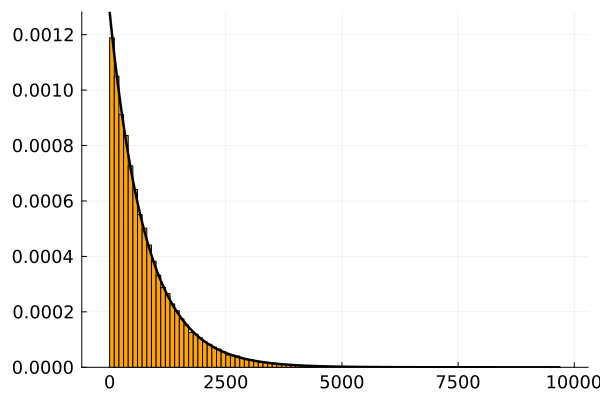

In [13]:
mu = sqrt(6*n)/pi 
hist = histogram(ones_, 
                normalize=true, 
                legend = false, 
                color = :orange, 
                bins =:scott,
                xtickfontsize=12,
                ytickfontsize=12,
                formatter = identity)
exp_density(x) = exp.(-x./mu)./mu
max_one_ = maximum(ones_)
xs = 0:max_one_
plot!(hist, xs, exp_density(xs),color =:black, linewidth=2.5)
savefig(hist, "../Figures/ones_1e$k.pdf")
hist

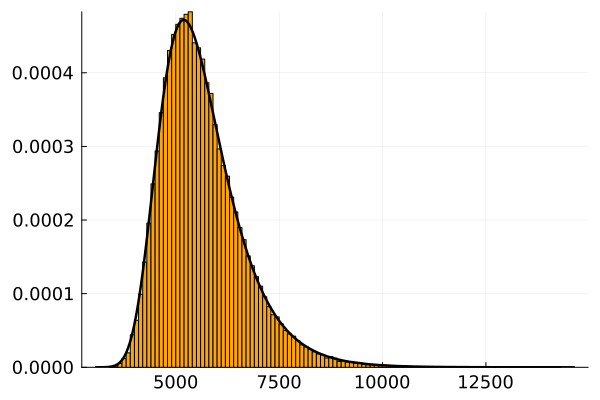

In [14]:
scale = sqrt(6*n)/pi 
loc = log(sqrt(6*n)/pi)*scale

hist = histogram(parts_,
                normalize=true, 
                legend = false, 
                color = :orange, 
                bins =:scott,
                xtickfontsize=12,
                ytickfontsize=12,
                formatter = identity)
gumble_cdf(x) = exp.(.-(x.-loc)./scale .- exp.(.-(x.-loc)./scale))./scale
plot!(hist, gumble_cdf, color =:black, linewidth=2.5)
savefig(hist, "../Figures/parts_1e$k.pdf")
hist